# Introduction to Notebooks

This notebook did not appear in the video series, it is meant as a practical guide to help you write your own notebooks and naviagate around them.

In a Jupyter notebook, we have individual cells, which can be either code cells or markdown cells. 

The heading and this text are both examples of markdown cells.

Let's have a code cell where we import some of the packages we would like to use:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

Now that the code has been imported, we can use it in future cells. The Python interpreter that runs in the background keeps track of all the different cells that have been run.

This is similar to the Python REPL (Read-Evaluate-Print loop) that you might have used by typing `python` or `ipython` at the command line, or using a tool such as Spyder.

In [2]:
# This will get us in trouble later
N_SIDES = 6

In [3]:
# We can now define a function in here, that can be used in future cells
def roll_n_dice(n_dice: int) -> int:
    """Rolls N six-sided die and returns the total rolled"""
    # Warning -- this will lead us into danger!
    rolls = [random.randint(1, N_SIDES) for _ in range(n_dice)]
    return sum(rolls)

### Printing in Jupyter notebooks

In [4]:
# We can show the function from a previous cell is remembered.
# Note that the last value in a cell is printed out, if it is not assigned to a variable
roll_n_dice(2)

8

In [5]:
# If we want to supress this behaviour, we can add a semi-colon
roll_n_dice(2);

In [6]:
# this won't print out, because the value is stored in a variable
result_of_roll = roll_n_dice(2)

In [7]:
# but we can "evaluate" the answer
result_of_roll

4

In [8]:
# or we can just print it, the way the programming gods intended
print(result_of_roll)

4


In [9]:
# It is usually better to explicitly print, rather than rely on the odd behavior of the last  executed statement.
# "Explicit is better than implicit!"
# Note this is only printed once
result_of_roll
result_of_roll

4

In [10]:
# but by being explicit, it is easier to predict what we get from running a cell
print(result_of_roll)
print(result_of_roll)

4
4


One of the things that Jupyter notebooks allow us to do really well is quickly visualize the result of our code. This example is a little bit contrived, but we can ask "what are the most common number that occurs if you roll two dice?"

Of course, the avid Euro-gamers among you already know the answer is 7 =)

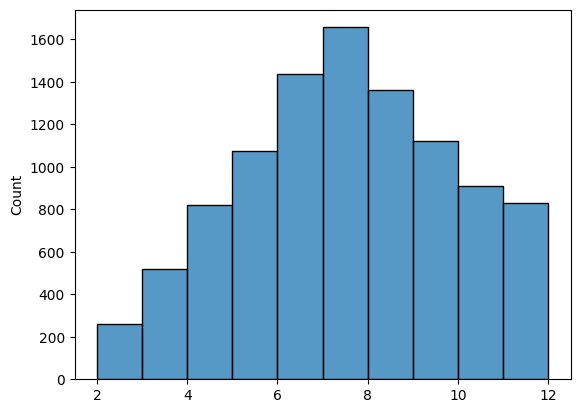

In [11]:
# simulate rolling many times 
many_rolls = [roll_n_dice(n_dice=2) for _ in range(10000)]
sns.histplot(many_rolls, binwidth=1);  # we want the plot, which the function prints, but to ignore some noisey output

Notebooks do allow for iteration and rapid development. We will see more of this in the next notebook.

They also allow us to embed what the results mean in with the results itself.

The notebooks also keep track of the order of execution -- if we see the numbers out of order, or missing numbers, it is often a sign to take care, as we will have trouble reasoning about state (and it is safer to restart). 

There are a lot of convinience methods as well, such as the ability to recall the output from a previous cell. For example, we never stored the value from our first use of our roll function in cell `In[4]`. At least not explicitly -- Jupyter did it for us!

In [17]:
Out[4]

8